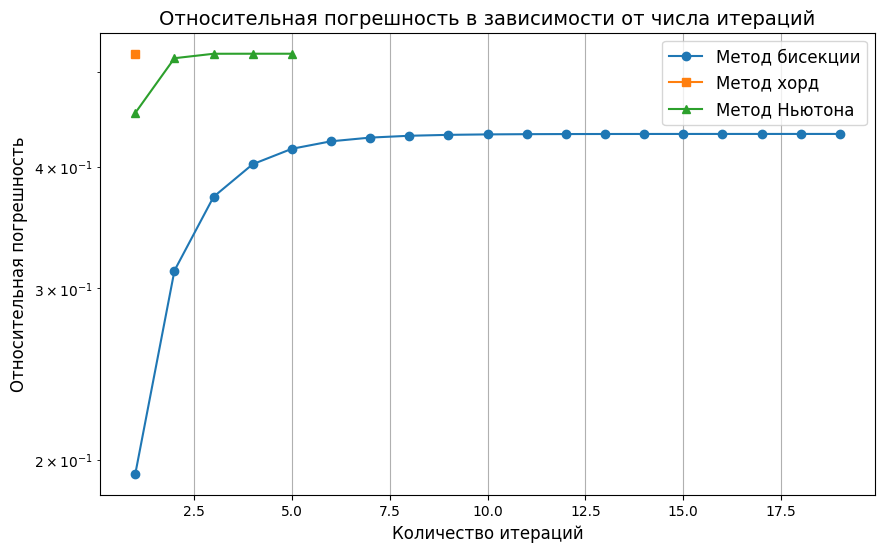

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Определяем функцию и её производную
def f(x):
    return x**3 - 6*x**2 + 5*x

def df(x):
    return 3*x**2 - 12 * x + 5

# Аналитическое значение корня (известное заранее или вычисленное с высокой точностью)
x_true = 2.0945514815423265

# Метод бисекции с сохранением погрешностей
def bisection_method_with_errors(left, right, epsilon):
    errors = []  # Список для хранения относительных погрешностей
    count_of_iterations = 0
    
    while abs(right - left) > 2 * epsilon:
        mid = (right + left) / 2
        
        # Вычисляем относительную погрешность
        relative_error = abs(mid - x_true) / abs(x_true)
        errors.append(relative_error)
        
        if f(left) * f(mid) < 0:
            right = mid
        else:
            left = mid
        
        count_of_iterations += 1
    
    return errors

# Метод хорд с сохранением погрешностей
def method_of_chord_with_errors(left, right, epsilon):
    errors = []  # Список для хранения относительных погрешностей
    count_iterations = 0
    
    while True:
        x0 = right - ((f(right) * (left - right)) / (f(left) - f(right)))
        
        # Вычисляем относительную погрешность
        relative_error = abs(x0 - x_true) / abs(x_true)
        errors.append(relative_error)
        
        count_iterations += 1
        
        if abs(f(x0)) < epsilon:
            return errors
        
        if f(right) * f(x0) < 0:
            left = x0
        else:
            right = x0

# Метод Ньютона с сохранением погрешностей
def newton_method_with_errors(x0, epsilon):
    errors = []  # Список для хранения относительных погрешностей
    x_curr = x0
    iter_count = 0
    
    while True:
        if df(x_curr) == 0:
            raise ValueError("Производная равна нулю. Метод Ньютона не может быть применён.")
        
        x_next = x_curr - f(x_curr) / df(x_curr)
        
        # Вычисляем относительную погрешность
        relative_error = abs(x_next - x_true) / abs(x_true)
        errors.append(relative_error)
        
        iter_count += 1
        
        diff = abs(x_next - x_curr)
        if diff < epsilon:
            return iter_count
        
        x_curr = x_next

# Построение графиков относительной погрешности
if __name__ == "__main__":
    # Параметры
    epsilon = 1e-6
    left, right = 2, 3  # Интервал для методов бисекции и хорд
    x0 = 2  # Начальное приближение для метода Ньютона

    # Получаем погрешности для каждого метода
    bisection_errors = bisection_method_with_errors(left, right, epsilon)
    chord_errors = method_of_chord_with_errors(left, right, epsilon)
    newton_errors = newton_method_with_errors(x0, epsilon)

    # График
    plt.figure(figsize=(10, 6))
    
    # График для метода бисекции
    plt.plot(range(1, len(bisection_errors) + 1), bisection_errors, label="Метод бисекции", marker='o')
    
    # График для метода хорд
    plt.plot(range(1, len(chord_errors) + 1), chord_errors, label="Метод хорд", marker='s')
    
    # График для метода Ньютона
    plt.plot(range(1, len(newton_errors) + 1), newton_errors, label="Метод Ньютона", marker='^')
    
    # Настройка графика
    plt.title("Относительная погрешность в зависимости от числа итераций", fontsize=14)
    plt.xlabel("Количество итераций", fontsize=12)
    plt.ylabel("Относительная погрешность", fontsize=12)
    plt.yscale("log")  # Логарифмическая шкала для лучшей визуализации
    plt.grid(True)
    plt.legend(fontsize=12)
    
    # Отображение графика
    plt.show()